In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [100]:
vars_df=pd.read_csv('Output/clean_data.csv', low_memory=False)

In [101]:
# Removing rows having numdays > 3651 which seems may be wrong entry in the raw data file.
vars_clean_df=vars_df.loc[vars_df.NUMDAYS<3651]
vars_clean_df

,Unnamed: 0,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,HOSP_VISIT
0,0,413802,01/01/2011,CO,13,F,NaN,NaN,NaN,NaN,...,NaN,U,44.0,1,NaN,01/01/2011,HPV4,MERCK & CO. INC.,UNK,Y
1,1,413803,01/01/2011,TN,67,F,NaN,NaN,NaN,NaN,...,NaN,U,0.0,1,NaN,01/01/2011,FLU3,CSL LIMITED,UNK,NaN
2,2,413804,01/01/2011,MN,62,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,1,NaN,01/01/2011,PPV,UNKNOWN MANUFACTURER,1,NaN
3,3,413808,01/01/2011,WA,65,F,NaN,NaN,NaN,NaN,...,NaN,Y,1801.0,1,NaN,01/01/2011,VARZOS,MERCK & CO. INC.,UNK,NaN
4,4,413830,01/01/2011,TN,76,M,NaN,NaN,NaN,NaN,...,NaN,N,9.0,1,NaN,12/28/2010,FLU3,NOVARTIS VACCINES AND DIAGNOSTICS,UNK,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603024,603024,1442854,07/02/2021,FL,17,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,2,NaN
603025,603025,1442855,07/02/2021,RI,52,F,NaN,NaN,NaN,NaN,...,NaN,N,88.0,2,chlorhexidine scrub (rash),07/02/2021,COVID19,PFIZER\BIONTECH,1,Y
603026,603026,1442856,07/02/2021,CA,37,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,1,NaN
603027,603027,1442857,07/02/2021,DE,69,F,NaN,NaN,NaN,NaN,...,NaN,N,4.0,2,None known,07/02/2021,COVID19,PFIZER\BIONTECH,2,YY


In [102]:
# bins created for getting a range
bins = [10, 20,30,40,50,60,70,80,90,100,110]

# label for the bins
age_group = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

# A column Age Ranges added and the dataframe cuts based on the label
vars_clean_df['Age Ranges']=pd.cut(vars_clean_df.AGE_YRS, bins, labels=age_group)

# Dataframe sorted based Age and grouped by Age Ranges and Numdays.
age_vars_died_df=vars_clean_df.sort_values('AGE_YRS').groupby(['Age Ranges']).count()
age_vars_died_df.head(50)

<ipython-input-102-8c4e92a47e76>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_clean_df['Age Ranges']=pd.cut(vars_clean_df.AGE_YRS, bins, labels=age_group)


,Unnamed: 0,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,HOSP_VISIT
Age Ranges,,,,,,,,,,,,,,,,,,,,,
10-20,48391,48391,48391,43594,48391,48391,81,75,631,1822,...,575,43257,48391,48391,17518,47895,48391,48391,47882,15485
20-30,63843,63843,63843,57465,63843,63843,69,64,636,1579,...,615,57129,63843,63843,33004,63439,63843,63843,63108,20885
30-40,83719,83719,83719,76268,83719,83719,137,135,995,2130,...,978,75735,83719,83719,49773,83251,83719,83719,82888,29112
40-50,83638,83638,83638,77003,83638,83638,237,229,1250,2330,...,1233,76211,83638,83638,50570,83111,83638,83638,82828,29452
50-60,98133,98133,98133,90749,98133,98133,458,432,1508,3183,...,1663,89673,98133,98133,56894,97374,98133,98133,96992,32379
60-70,107578,107578,107578,100272,107578,107578,1027,995,1818,4255,...,1857,98985,107578,107578,59255,106574,107578,107578,106134,34876
70-80,59133,59133,59133,54926,59133,59133,1287,1239,1218,3638,...,1092,53660,59133,59133,31824,58447,59133,59133,58314,21411
80-90,18540,18540,18540,16804,18540,18540,1341,1294,557,2037,...,447,16364,18540,18540,9000,18293,18540,18540,18299,8019
90-100,3285,3285,3285,2890,3285,3285,544,532,137,427,...,82,2807,3285,3285,1638,3245,3285,3285,3253,1448


In [103]:
avg_numdays=(age_vars_died_df.DIED/age_vars_died_df.NUMDAYS).apply(lambda x: format(x, '.2%'))

In [104]:

# NUMDAYS is the number of days from vaccinated day to adverse event symptoms reported.
# Reported average is the died to numdays.
age_numdays = pd.DataFrame({"Age Range":age_group, "Died":age_vars_died_df.DIED,
                   "Numdays":age_vars_died_df.NUMDAYS,
                   "Reported_Avg":avg_numdays})
# Resetting index
age_numdays.reset_index(drop=True, inplace=True)
age_numdays

,Age Range,Died,Numdays,Reported_Avg
0,10-20,81,48391,0.17%
1,20-30,69,63843,0.11%
2,30-40,137,83719,0.16%
3,40-50,237,83638,0.28%
4,50-60,458,98133,0.47%
5,60-70,1027,107578,0.95%
6,70-80,1287,59133,2.18%
7,80-90,1341,18540,7.23%
8,90-100,544,3285,16.56%
9,100+,32,85,37.65%


In [129]:
plt.style.use('seaborn')
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}

<BarContainer object of 10 artists>

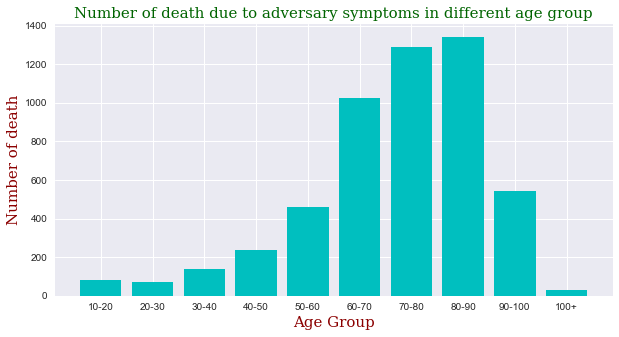

In [149]:
# Bar plotting of age ranges vs died and numdays
plt.figure(figsize=(10,5))
plt.title("Number of death due to adversary symptoms in different age group",fontdict=font1)
plt.xlabel("Age Group",fontdict=font2)
plt.ylabel('Number of death',fontdict=font2)
plt.bar(age_numdays['Age Range'],age_numdays.Died, color='c')

<BarContainer object of 10 artists>

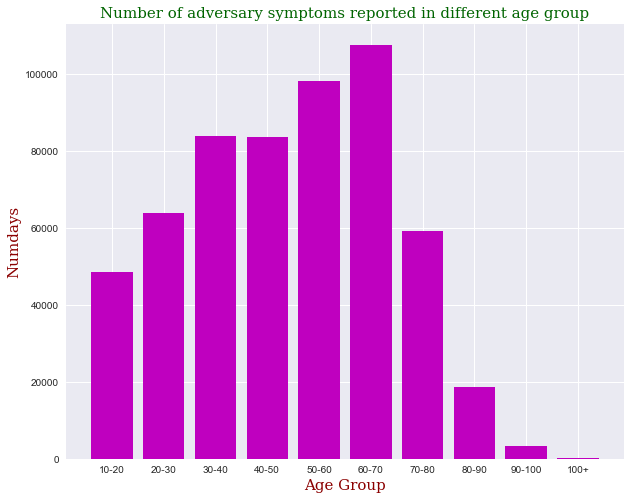

In [137]:
plt.figure(figsize=(10,8))
plt.title("Number of adversary symptoms reported in different age group",fontdict=font1)
plt.xlabel("Age Group",fontdict=font2)
plt.ylabel('Numdays',fontdict=font2)
plt.bar(age_numdays['Age Range'],age_numdays.Numdays, color='m')


# width =0.3
# plt.bar(np.arange(len(data1)), data1, width=width)
# plt.bar(np.arange(len(data2))+ width, data2, width=width)
# plt.show()

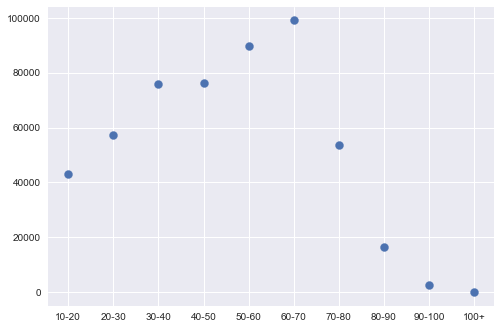

In [147]:
plt.scatter(age_numdays.iloc[:,0], age_vars_died_df.iloc[:,12],marker='o',s=65)